# Personalized Health Advice System with K-Fold and Advanced Model Training

In [3]:
# Install required libraries (if needed)
!pip install -q pandas scikit-learn

# 1. Importing Libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import accuracy_score, classification_report
import pickle

# 2. Load Dataset
df = pd.read_csv('/data1/SANCHAYANghosh01/Personalized_HealthCare_System/Training.csv')
df.drop_duplicates(inplace=True)

# 3. Feature and Target Separation
X = df.drop('prognosis', axis=1)
y = df['prognosis']

# 4. Encode Labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 5. Feature Selection - Remove low-variance features
selector = VarianceThreshold(threshold=0.01)
X_selected = selector.fit_transform(X)

# 6. Stratified K-Fold Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

models = {
    "RandomForest": RandomForestClassifier(n_estimators=100, max_depth=6, min_samples_leaf=4, random_state=42),
    "GaussianNB": GaussianNB()
}

print("==== Model Performance with 5-Fold Stratified Cross-Validation ====")
for name, model in models.items():
    scores = cross_val_score(model, X_selected, y_encoded, cv=skf)
    print(f"{name} Average Accuracy: {np.mean(scores):.4f}")

# 7. Final Model Training
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)
final_model = RandomForestClassifier(n_estimators=100, max_depth=6, min_samples_leaf=4, random_state=42)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

print("\n==== Final Model Evaluation ====")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))

# 8. Save the Model
with open("random_forest_model.pkl", "wb") as f:
    pickle.dump(final_model, f)

# 9. Load and Test Model
with open("random_forest_model.pkl", "rb") as f:
    model = pickle.load(f)

# 10. Prediction Function
symptoms_dict = {symptom: idx for idx, symptom in enumerate(X.columns)}
disease_list = {idx: disease for idx, disease in enumerate(le.classes_)}

def predict_disease(symptoms):
    input_vector = np.zeros(len(symptoms_dict))
    for s in symptoms:
        if s in symptoms_dict:
            input_vector[symptoms_dict[s]] = 1
    input_vector = selector.transform([input_vector])  # Align with selected features
    prediction = model.predict(input_vector)[0]
    return disease_list[prediction]

# 11. Test Prediction
user_input = input("Enter symptoms separated by commas: ")
user_symptoms = [s.strip() for s in user_input.split(',')]
predicted = predict_disease(user_symptoms)
print("\nPredicted Disease:", predicted)

# 12. Load CSVs for Recommendations
precautions = pd.read_csv('/data1/SANCHAYANghosh01/Personalized_HealthCare_System/precautions_df.csv')
medications = pd.read_csv('/data1/SANCHAYANghosh01/Personalized_HealthCare_System/medications.csv')
diet = pd.read_csv('/data1/SANCHAYANghosh01/Personalized_HealthCare_System/diets.csv')
description = pd.read_csv('/data1/SANCHAYANghosh01/Personalized_HealthCare_System/description.csv')
workout = pd.read_csv('/data1/SANCHAYANghosh01/Personalized_HealthCare_System/workout_df.csv')

# 13. Recommendation Function
def get_recommendations(disease):
    desc = description[description['Disease'] == disease]['Description'].values
    pre = precautions[precautions['Disease'] == disease][['Precaution_1', 'Precaution_2', 'Precaution_3', 'Precaution_4']].values
    med = medications[medications['Disease'] == disease]['Medication'].values
    diets = diet[diet['Disease'] == disease]['Diet'].values
    wrk = workout[workout['disease'] == disease]['workout'].values

    print("\n=== Recommendations for", disease, "===")
    print("Description:", desc[0] if len(desc) > 0 else "N/A")
    print("Precautions:", ', '.join(pre[0]) if len(pre) > 0 else "N/A")
    print("Medications:", ', '.join(med) if len(med) > 0 else "N/A")
    print("Diet:", ', '.join(diets) if len(diets) > 0 else "N/A")
    print("Workout:", ', '.join(wrk) if len(wrk) > 0 else "N/A")

# 14. Display Recommendation
get_recommendations(predicted)


==== Model Performance with 5-Fold Stratified Cross-Validation ====


/data/kshitij/miniconda3/envs/sanenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/data/kshitij/miniconda3/envs/sanenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/data/kshitij/miniconda3/envs/sanenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

RandomForest Average Accuracy: 0.8355
GaussianNB Average Accuracy: 1.0000

==== Final Model Evaluation ====
Accuracy: 0.8586956521739131
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       0.67      1.00      0.80         2
                                   AIDS       0.00      0.00      0.00         1
                                   Acne       0.00      0.00      0.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         2
                                Allergy       0.00      0.00      0.00         2
                              Arthritis       1.00      1.00      1.00         2
                       Bronchial Asthma       0.40      1.00      0.57         2
                   Cervical spondylosis       0.00      0.00      0.00         2
                            Chicken pox       1.00      1.00      1.00         3
                    Chronic cholestasis       1.00  

/data/kshitij/miniconda3/envs/sanenv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but VarianceThreshold was fitted with feature names
  warnings.warn(


In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Example: create model and param grid
rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20]
}

# Setup grid search
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

# Now save best model
import joblib
joblib.dump(grid_search.best_estimator_, "random_forest_model.pkl")
joblib.dump(X.columns.tolist(), "selected_features.pkl")

['selected_features.pkl']

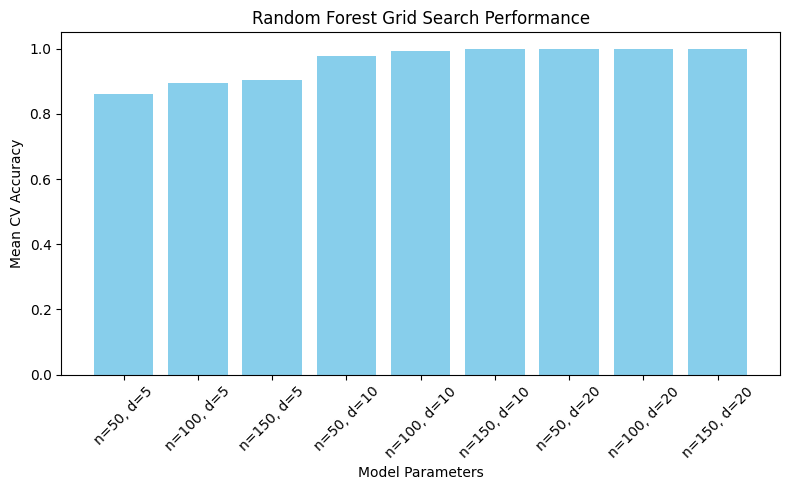

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import matplotlib.pyplot as plt

# Example training data (replace with your own)
# X, y = ...  # your feature matrix and target labels

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 20]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(rf, param_grid, cv=cv, scoring='accuracy')
grid_search.fit(X, y)  # Make sure X and y are defined

# Now your plotting code will work
results = grid_search.cv_results_
mean_scores = results['mean_test_score']
params = results['params']

labels = [f"n={p['n_estimators']}, d={p['max_depth']}" for p in params]

plt.figure(figsize=(8, 5))
plt.bar(labels, mean_scores, color='skyblue')
plt.ylabel('Mean CV Accuracy')
plt.xlabel('Model Parameters')
plt.title('Random Forest Grid Search Performance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
